In [1]:
library(corrplot)

corrplot 0.92 loaded



### Data

The UD GUM corpus, train + dev (https://corpling.uis.georgetown.edu/gum/download.html)

### Model

`bert-base-cased`

### Probing method

Correlational analysis of the activation patterns in the pooler output: embedding of the CLS token in the last layer of the BERT model fed into an additional two-layer MLP.

In [2]:
gum.all <- read.csv('../csv/mbert_vanilla_GUM_roots_ff_train_dev_6.csv', h = F)
dim(gum.all)

[1] 6507  768

In [3]:
gum.sentences <- scan('GUM_sentences.txt', sep='\n', what='character')
length(gum.sentences)

[1] 6507

In [4]:
# We can what the activations in the pooler output
# correlate with in domain of lexicon, dependency relations,
# and individual lexical items.

gum.binary.deprel <- read.csv('GUM_binary_deprels.csv')
# Exclude the root, which is found everywhere
gum.binary.deprel <- gum.binary.deprel[, -which(colnames(gum.binary.deprel) == 'root')]
gum.binary.pos    <- read.csv('GUM_binary_POS.csv')
gum.binary.words  <- read.csv('GUM_binary_words.csv')

In [5]:
gum.pooler.cor.deprel <- cor(gum.all, gum.binary.deprel)
gum.pooler.cor.pos <- cor(gum.all, gum.binary.pos)
gum.pooler.cor.words <- cor(gum.all, gum.binary.words)

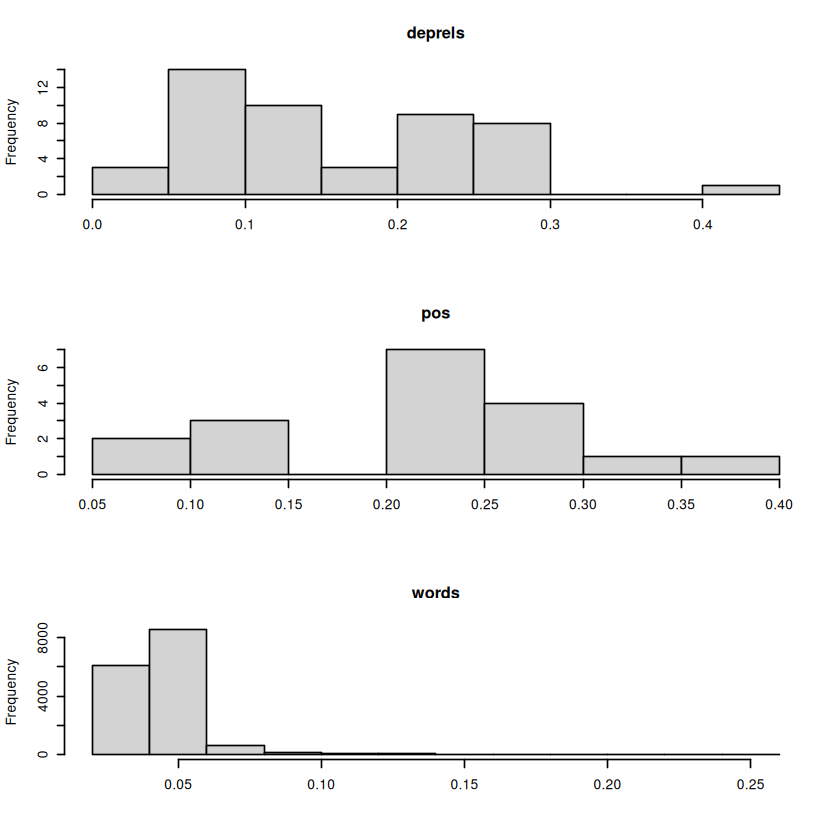

In [6]:
# Histogram of maximum (in absolute values) correlations
# for each deprel, POS, and word resp
par(mfrow=c(3,1))
hist(apply(abs(gum.pooler.cor.deprel), 2, max), xlab='', main='deprels')
hist(apply(abs(gum.pooler.cor.pos), 2, max), xlab='', main='pos')
hist(apply(abs(gum.pooler.cor.words), 2, max), xlab='', main='words')

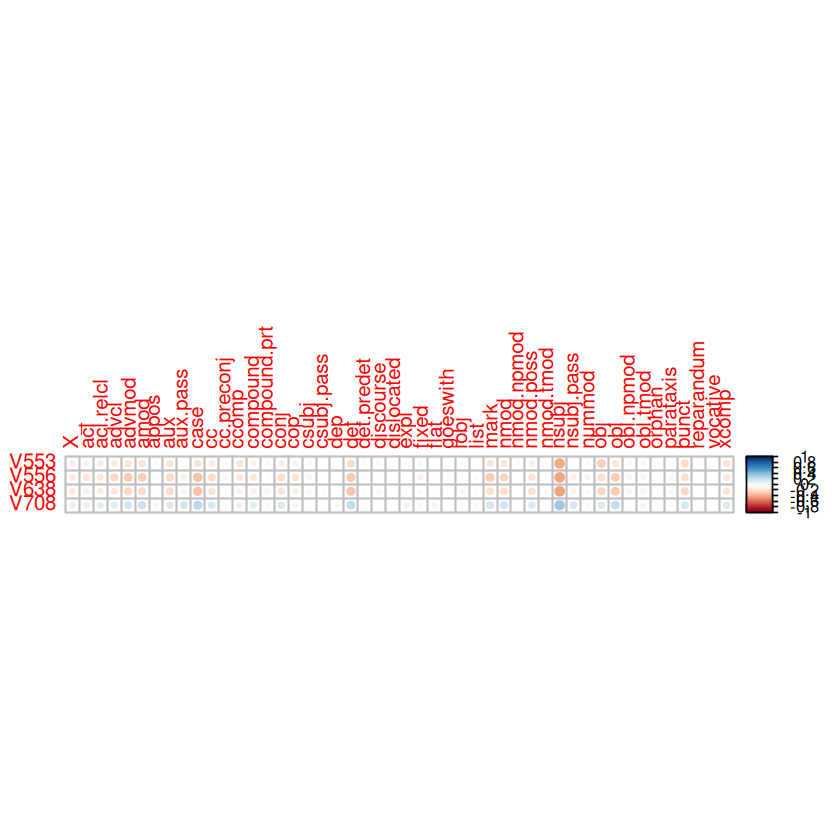

In [7]:
# Corrplots showing the strongest correlations between activations
# and different features of sentences
prominent.neurons.deprels <- which(apply(abs(gum.pooler.cor.deprel), 1, max) > 0.35)
corrplot(gum.pooler.cor.deprel[prominent.neurons.deprels,])

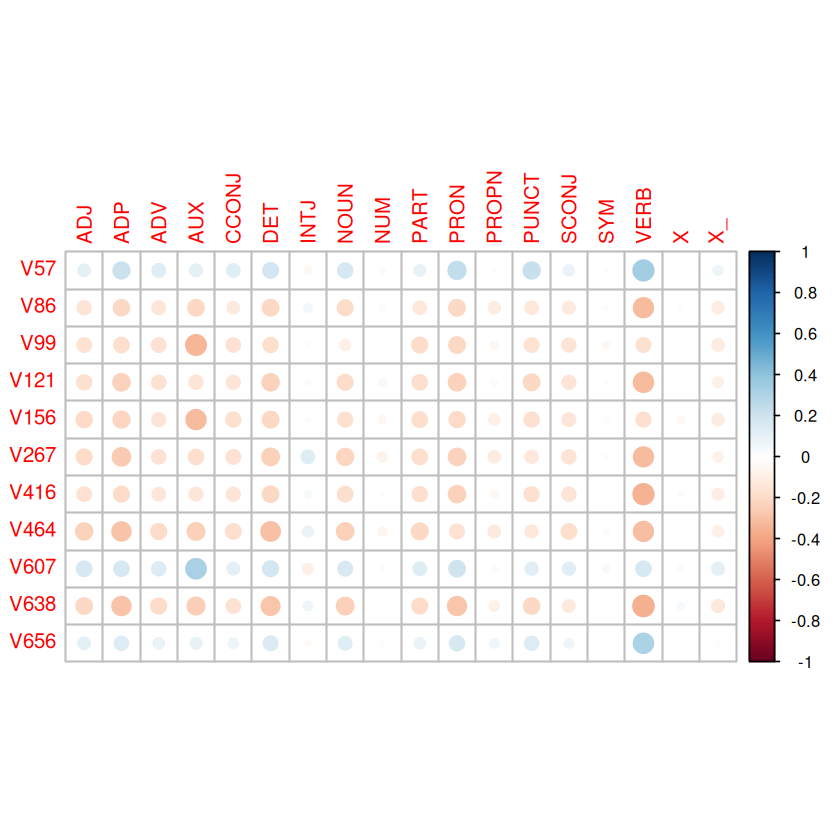

In [8]:
prominent.neurons.pos <- which(apply(abs(gum.pooler.cor.pos), 1, max) > 0.3)
corrplot(gum.pooler.cor.pos[prominent.neurons.pos,])

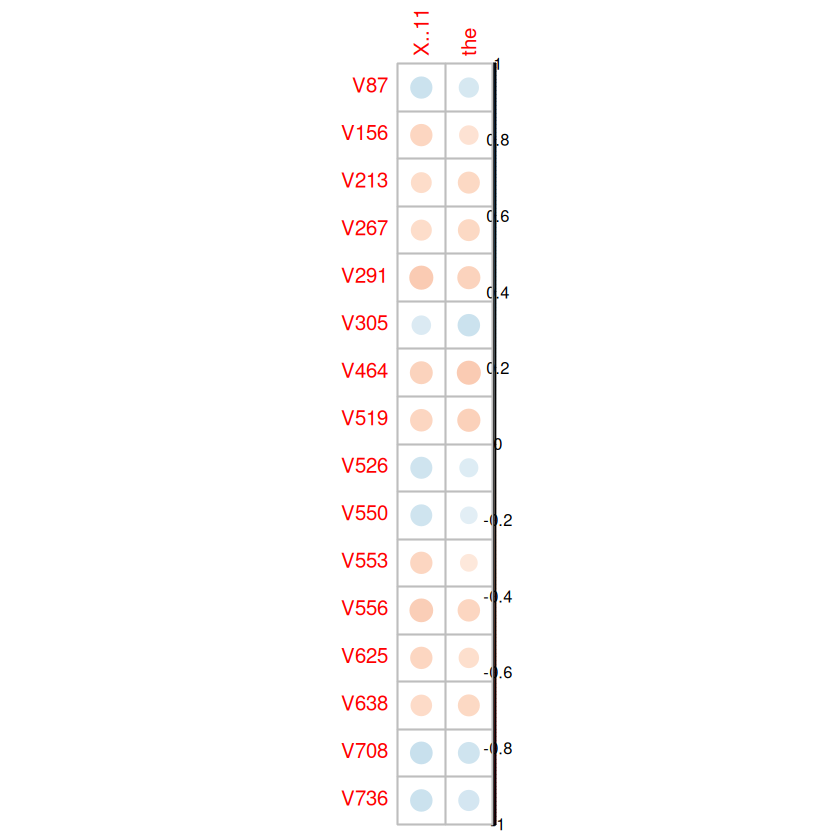

In [9]:
# Some neurons react to function words.
prominent.words <- which(apply(abs(gum.pooler.cor.words), 2, max) > 0.25)
prominent.neurons.words <- which(apply(abs(gum.pooler.cor.words[,prominent.words]), 1, max) > 0.2)
corrplot(gum.pooler.cor.words[prominent.neurons.words,prominent.words])

In [4]:
gum.pooler.pca <- prcomp(gum.all)

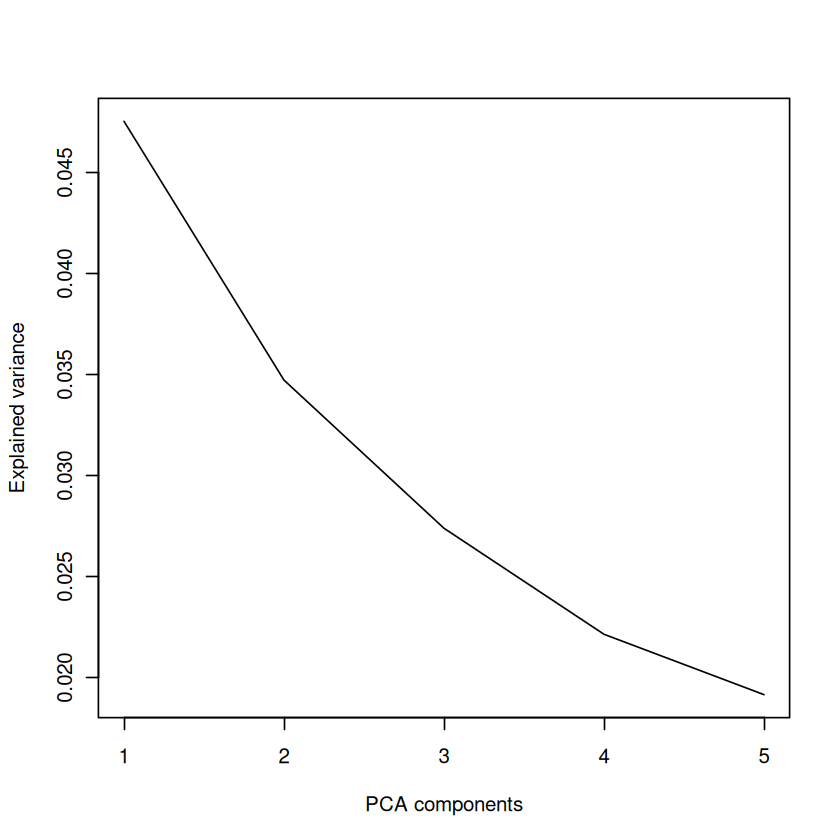

In [5]:
# Pooler activations are higly correlated:
# more than half of variation is contained inside
# a single component.
var_explained = gum.pooler.pca$sdev^2 / sum(gum.pooler.pca$sdev^2)
plot(var_explained[1:5] ~ seq_along(var_explained[1:5]), type='l', 
     xlab='PCA components',
     ylab='Explained variance')

In [6]:
var_explained[1]

[1] 0.04754172

In [7]:
sum(var_explained[1:3])

[1] 0.1096746

In [12]:
# What stands behind this? Let's extract sentences with biggest 
# and lowest activations for the first three components

In [15]:
show.sentences <- function(pca.matrix, i, n, sentences, sep='\n\n') {
    # If n is positive we select the head (minimal scores);
    # otherwise we select the tail (maximal scores).
    sort.results <- sort(pca.matrix[,i], index.return=T)
    indices      <- sort.results$ix
    values       <- sort.results$x
    if (n > 0) {
        for (i in 1:n) {
            cat(sprintf("%f %s", values[i], sentences[indices[i]]))
            cat(sep)
        }
    } else {
        n.sentences <- length(sentences)
        for (i in (n.sentences+n):n.sentences) {
            cat(sprintf("%f %s", values[i], sentences[indices[i]]))
            cat(sep)
        }
    }
}

### First principal component

Minimum values: ???

In [16]:
show.sentences(gum.pooler.pca$x, 1, 15, gum.sentences)

-3.973747 Doing this too often can quickly turn an otherwise flirtatious conversation into one in which you appear needy and self-loathing .

-3.470322 And just as the wash hit us , prising us from the whale ’s speckled back and down into the sea , someone threw down a knotted rope and we hung on for dear life .

-3.461380 The many light toys such a swords , devil ears , and lanterns turn the milling crowd into a unique light show that can be observed by climbing the steps of the 70 meter memorial hall on the grounds .

-3.454905 If wikiHow volunteers think our site is going in the wrong direction , they can take all the content and all the software and move the project elsewhere .

-3.321897 With development of Microsoft 's Internet Explorer 9 ( IE9 ) browser almost complete , Microsoft announced on Friday that it is time for IE6 users to move away from the antiquated 10-year-old browser .

-3.275528 With Bush , the aggressive militarism of the Bush administration , as predicted , ind

Maximum values: ???

In [17]:
show.sentences(gum.pooler.pca$x, 1, -15, gum.sentences)

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.816477 Image : Nick Moreau .

5.860155 Image : NASA

5.860155 Image : NASA

5.887841 Image : Twitter / NASA .

5.888213 Image ; Zach Weiner .

5.890060 Talk

5.938692 Image : Jambula .

7.083497 image : Daily et al.



### Second principal component

Minimum values: instructions

In [16]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=40)])

Professor Eastman says iodine is added to only 10 per cent of Australian salt in contravention of a World Health Organisation recommendation that all salt be iodised .

Microsoft says that the latest versions of Internet Explorer provide the user with enhanced protection from these attacks and threats .

“ Robert , ” Mom says ,

Nevertheless , the House managers proved their case .

The legend says that the King of Athens , Theseus unified the ten tribes of early Athens into one kingdom ( c. 1230 BC ) .

“ Renata , ” my mother says .

A white emblem resided on their right arms and left breast , an all-encompassing full black helmet upon their heads , its smooth form negating all facial features .

The US State Department said John Kerry , the Secretary of State , contacted Thailand 's foreign minister over temporary housing for the Rohingya out at sea .

“ Okay , ” my mother says .

Professor Eastman said he is alarmed by what they found .

“ What ? ” my mother says .

I bounced around

Maximum values: ???

In [17]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,2], index.return=T)$ix, n=20)])

If it 's inherently negative , then they 're either over-zealous , ignorant of other people or what to avoid those that contradict their fantasy land that caters to them and them only .

Asking for help with a work or school-related problem is almost always a good bet , as is asking a question about something striking about the person .

If wikiHow volunteers think our site is going in the wrong direction , they can take all the content and all the software and move the project elsewhere .

Because , you know , I mean , you can make a horse go lame , by doing it .

Jealousy of your achievements or seeming lifestyle can cause another person to feel smug or arrogant about something they think they do better than you or own / have that you do n't .

A plain black leotard and pink tights are usually a safe bet .

The central idea is to first apply rules to the smallest applicable unit , then to the smallest unit containing that one , and so on . [ 5 ]

Łódź ( Pronounced : Wootch ) is Polan

### Third principal component

Minimum values: ???

In [18]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=15)])

You have a long career in poetry , but as of late the attention you have garnered is for the Mets-inspired work .

People have different skills , talents , and interests , so they will be better at some jobs than at others .

So I have a mini-MMPI that I --

We have an understanding based upon having the same writers in the back room for years , and those writers training the new writers as they come in .

We have a strong public health system .

You only have two .

-- but I have a chart that I 'll go through ; the MMPI .

We have some people who are great at politics ; some people we give all the war stuff to ; someone who is in charge of the Britney Spears story of the week — the entertainment stories .

They have a warm local atmosphere and taste great .

I only have uh , that many cards , so ...

We currently have just under 50000 articles and over 1000 featured articles .

I also have a profile they fill out for me , a mini-MMPI that I developed , so that I have an idea -- Rebecc

Maximum values: 1st person

In [19]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,3], index.return=T)$ix, n=20)])

Her limbs were weathered and ringed , like the branches of trees in the dry country .

That 's like not healthy for you ?

By adding certain chemicals , the ROS can be measured using the emission of light of a certain wave-length .

The straps on adults ’ overalls often get so twisted during the wash that one wishes she had just used an old fashioned washboard instead .

This theory , along with other theories of correspondence in translating , are elaborated in his essay Principles of Correspondence , where Nida begins by asserting that given that " no two languages are identical , either in the meanings given to corresponding symbols or in the ways in which symbols are arranged in phrases and sentences , it stands to reason that there can be no absolute correspondence between languages .

1 1/2 cups ( 350 ml ) plain soy milk

That is wild .

The girl who stood before the tall desk was red-headed .

Your appliances are also murder on the straps , which are almost always the first thin

### Fourth principal component

Mininum values: modal verbs

In [20]:
show.sentences(gum.sentences[head(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=15)])

The Andy Warhol Foundation for the Visual Arts made two donations to USI Art Collections , in 2007 and a second recently .

Moreau made her theatrical debut in 1947 , and established herself as one of the leading actresses of the Comédie-Française .

As a result , we made some mistakes along the path .

Marbles released a brand of dog toys called Kermie Worm & Mr. Marbles .

Holt made his Major League debut on September 1 , 2012 .

In 1947 , Moreau made her theatrical debut at the Avignon Festival .

In 2004 , Goode made his American film debut opposite Mandy Moore in the romantic comedy Chasing Liberty .

Built in 1602 by Shah Abbas I.= and designed by his chief architect , Sheikh Bahai .

Kathryn Waters , director of the gallery , expressed interest in further donations from the foundation in the future .

The wealthy constructed the grand Pasejo Montejo avenue north of the old town , inspired by the Champs-Élysées in Paris .

Is n’t the answer to that question that wise decisions ar

Maximum values: quotes with a verb of speech

In [21]:
show.sentences(gum.sentences[tail(sort(gum.pooler.pca$x[,4], index.return=T)$ix, n=20)])

Instead of using vegetable oil , try substituting it for walnut or macadamia nut oils if they are available to you .

You wo n't attack me yet .

I also love this .

We trail out of the store , Cara holding Mom ’s hand and sniffling .

I stand there and watch her back down the driveway .

See you then .

Do not drink if underage in your country .

Also see where all the other teams are at as well .

Hold the bird down gently with one hand .

In addition , wear gloves to protect your skin .

I sure do , I sure do .

Once the first bottle has been filtered , wash out the bottle and pour the Skittles vodka back in .

" -- think again . "

In other words , make sure that you follow the same guidelines .

When you see flower buds , pinch them and two pairs of leaves under them off .

Oh , see look , you just got all of his cards .

Then turn off the lights !

Also , take note of which item is in which box .

When starting off , follow closely to a language you like .

Yeah , " think again "